# <center> Flower Recognition Through CNN Keras

In [1]:
%%time

## Ölçeklenebilirlik sınırlaması yapay sinir ağı (Artificial Neural Network - ANN) modelinin bellek gereksinimlerini veya boyutlarını hesaplamak için kullan ANN
im_size=1024* 1024*3
im_size
(im_size*512 + 512) + (512*100 + 100) + (100 + 1)

CPU times: total: 0 ns
Wall time: 0 ns


1610664649

In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
print(os.listdir('input/'))


['flowers-recognition', 'into-to-cnn', 'trans-learn-weights', 'working']


---

<a id="content1"></a>
# 1. Importing Required Libraries

In [3]:
# uyarı mesajlarını kontrol etmek veya devre dışı bırakmak
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [4]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [5]:
#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [6]:
#preprocess.Bu kod, TensorFlow veya Keras kütüphanelerinde görüntü verilerini ön işlemek için kullanılan
#ImageDataGenerator sınıfını projeye dahil etmeye çalışır.

try:
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
except ImportError:
    from keras_preprocessing.image import ImageDataGenerator


In [7]:
#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

In [8]:
# specifically for  Keras kütüphanesinden CNN (Convolutional Neural Network) oluşturmak için gerekli olan katmanları projeye dahil eder.
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [9]:
# #configure
# #matplotlib'i satır içi olarak ayarlar ve grafikleri ilgili hücrenin altında görüntüler.
%matplotlib inline  
# style.use('fivethirtyeight')
# sns.set(style='whitegrid',color_codes=True)


import tensorflow as tf
import random as rn

# özellikle sıkıştırılmış görüntüleri işlemek ve görüntülerin piksel değerlerinin numpy dizilerini almak için.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

<a id="content2"></a>
# 2. Data Preparation

## A. Making the functions to get the training and validation set from the Images

In [10]:
X=[]  #Boş listeler, görüntü verileri ve etiketleri saklamak için 
Z=[]
IMG_SIZE=150  #Görüntü boyutları tüm veriler için 150x150 piksel olarak ayarlanacak.
FLOWER_DAISY_DIR='input/flowers-recognition/flowers/daisy'
FLOWER_SUNFLOWER_DIR='input/flowers-recognition/flowers/sunflower'
FLOWER_TULIP_DIR='input/flowers-recognition/flowers/tulip'
#FLOWER_DANDI_DIR='input/flowers-recognition/flowers/dandelion'
FLOWER_ROSE_DIR='input/flowers-recognition/flowers/rose'
#Farklı çiçek türlerine ait (papatya, ayçiçeği, lale, gül) görüntülerin dosya yolları tanımlanıyor.
# Amaç: Çiçek görüntülerini bu klasörlerden alıp işlemek ve model eğitimine hazırlamak.

In [11]:
def assign_label(img,flower_type):
    return flower_type
#Bu fonksiyon, bir görüntüye (img) belirli bir çiçek türü etiketi (flower_type) atıyor ve bu etiketi döndürüyor.

#Amaç: Görüntülerin etiketlenmesi (örneğin, "daisy", "rose" gibi).

In [12]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))  

        #Bu fonksiyon, görüntüleri işleyip uygun formatta veri ve etiket listeleri (X ve Z) oluşturur ve model eğitimine hazırlar.

In [13]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))
#Bu kod, papatya görüntüleri için eğitim verisini oluşturmak ve eklenen görüntülerin sayısını kontrol etmek için kullanılır.

100%|██████████| 764/764 [00:02<00:00, 347.35it/s]

764


In [14]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:02<00:00, 287.37it/s]

1497


In [15]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:02<00:00, 369.26it/s]

2481


In [16]:
# make_train_data('Dandelion',FLOWER_DANDI_DIR)
# print(len(X))

In [17]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:02<00:00, 363.99it/s]

3265


In [18]:
print(len(X))
print(len(Z))
print(set(Z))

3265
3265
{'Daisy', 'Sunflower', 'Rose', 'Tulip'}


## B. Visualize some Random Images

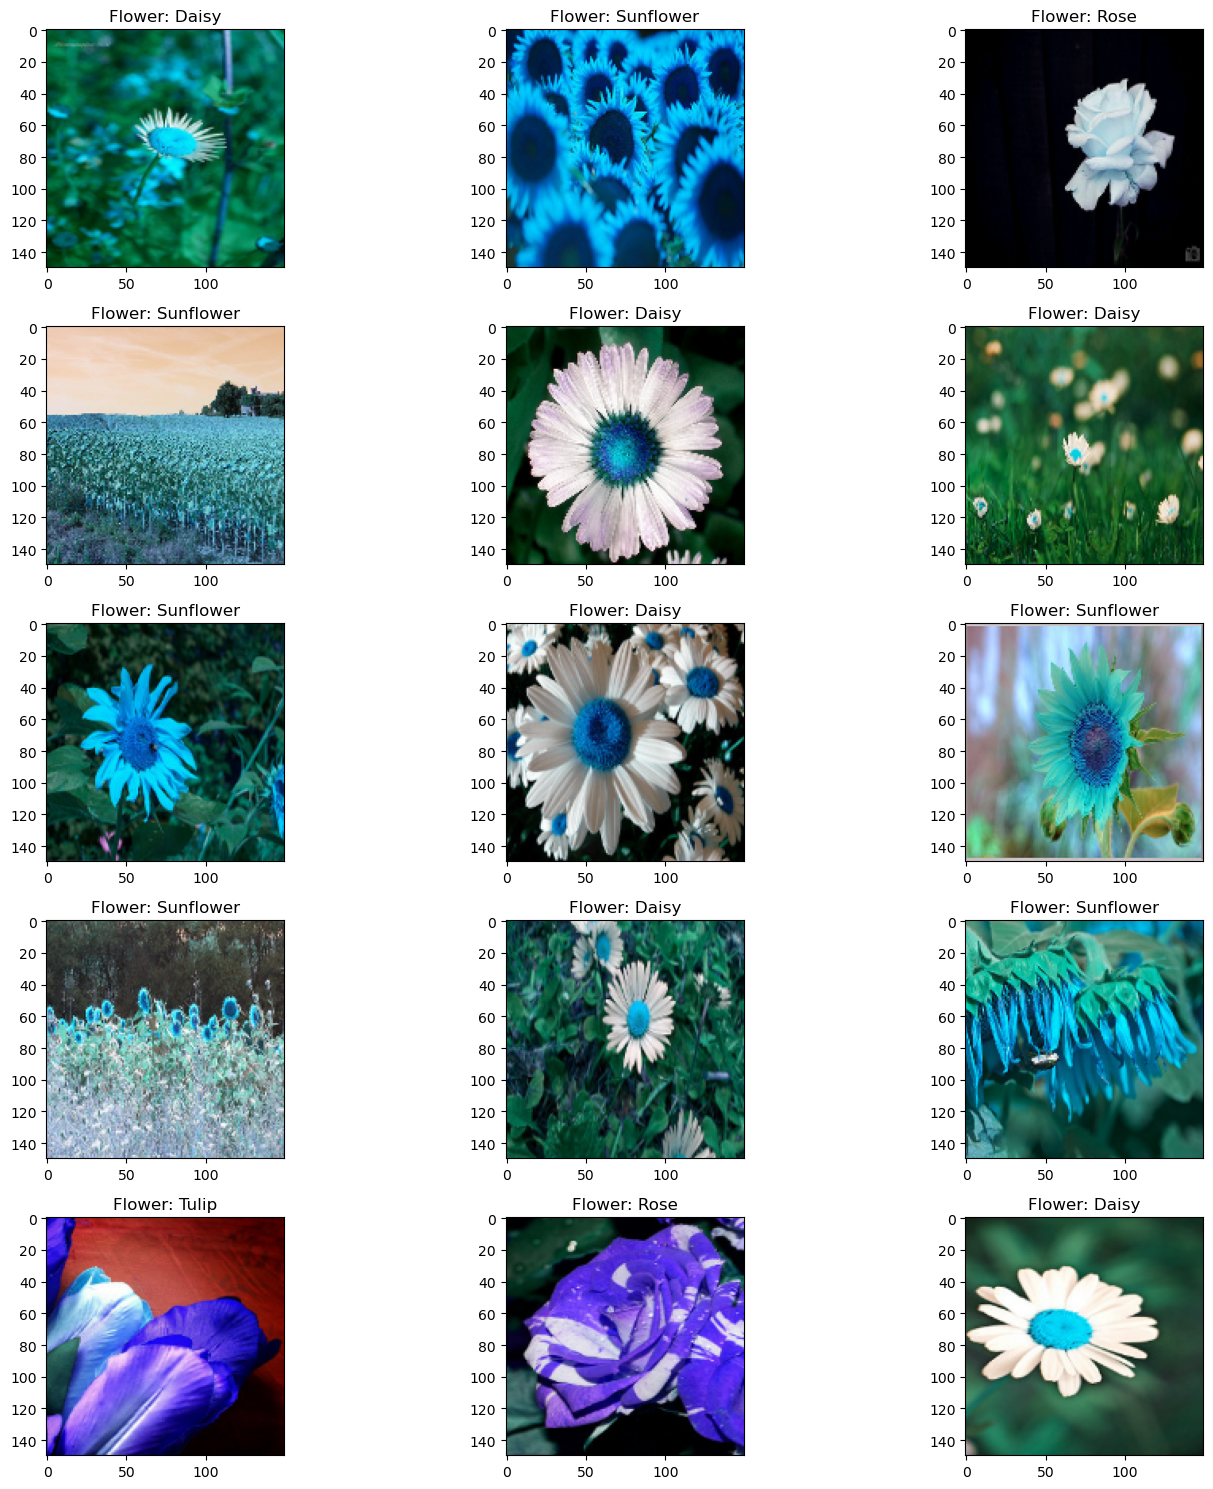

In [19]:
fig,ax=plt.subplots(5,3)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (3):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout();       
#Bu kod, bir matplotlib görseli oluşturur ve rastgele seçilen çiçek görüntülerini bir 5x3 ızgara düzeninde gösterir.

In [20]:
print("Number of Pixles in each image :",150*150*3)
#Bu kod, her bir görüntüdeki piksel sayısını hesaplar.

Number of Pixles in each image : 67500


## C. Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding

In [21]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,4)
print(Y.shape)
#Bu kod, çiçek türleri etiketlerini sayısal değerlere dönüştürür ve one-hot encoding (tek-sıcak kodlama) uygular:
#etiketleri sayısal değerlere dönüştürüp, sınıflandırma için uygun hale getiren bir veri hazırlığı yapar.

(3265, 4)


In [22]:
print(type(X))
print(len(X))
print(X[1].shape)
#Bu kod, X listesindeki verilerin yapısı hakkında bilgi almak için kullanılır.

<class 'list'>
3265
(150, 150, 3)


In [23]:
X_NEW=np.array(X)
# Image Standardization [Scale 0-1]
X_NEW=X_NEW/255
#Görüntüleri, modelin daha verimli öğrenebilmesi için 0-1 aralığına ölçeklendirir.

## D. Splitting into Training and Test Sets

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X_NEW,Y,test_size=0.20,random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
# Bu kod, veri setini eğitim ve test setlerine ayırır: X_NEW (özellikler) ve Y (etiketler) veri setini %80 eğitim ve %20 test setlerine ayırır.

In [25]:
np.shape(X_train),np.shape(y_train),np.shape(X_test),np.shape(y_test)
#np.shape(X_val),np.shape(y_val)
#Bu kod, eğitim ve test veri setlerinin boyutlarını kontrol eder:
#Veri setlerinin şekillerini kontrol ederek, her setin doğru şekilde bölündüğünü ve uygun boyutlarda olduğunu doğrulamak.

((2612, 150, 150, 3), (2612, 4), (653, 150, 150, 3), (653, 4))

## E. Setting the Random Seeds

In [26]:
import tensorflow as tf
import numpy as np
import random as rn

# Rastgele tohum ayarları
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)  # TensorFlow 2.x için doğru fonksiyon
#rastgele sayı üretimini kontrol etmek ve yeniden üretilebilir sonuçlar elde etmek için kullanılan tohum ayarlarını yapar:                                                                                                               
#  #Farklı çalıştırmalarda tutarlı ve tekrarlanabilir sonuçlar elde etmek için rastgelelik kontrol edilir.

<a id="content3"></a>
# 3. Modelling

## A. Building the CNN Model

In [27]:
9*64*32 + 64

18496

In [28]:
# CNN modeline başlıyoruz.

# CNN sınıflandırıcısını başlatma
model = Sequential()

# 32 adet 5x5 boyutunda çekirdek ve ReLU aktivasyon fonksiyonu ile bir Konvolüsyon katmanı ekleyin
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation ='relu', input_shape = (150,150,3)))

# 2x2 boyutunda bir Max Pooling katmanı ekleyin
model.add(MaxPooling2D(pool_size=(2,2)))

# 64 adet 3x3 boyutunda çekirdek ve ReLU aktivasyon fonksiyonu ile bir başka Konvolüsyon katmanı ekleyin
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))

# Bir başka pooling katmanı ekleyin
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 96 adet 3x3 boyutunda çekirdek ve ReLU aktivasyon fonksiyonu ile bir başka Konvolüsyon katmanı ekleyin
model.add(Conv2D(filters =96, kernel_size = (3,3), padding = 'Same', activation ='relu'))

# Bir başka pooling katmanı ekleyin
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Tam bağlantılı katmanlardan önce katmanı düzleştirme
model.add(Flatten())

# 512 nörondan oluşan tam bağlantılı bir katman ekleyin
model.add(Dense(512, activation='relu'))

# Son çıkış katmanı, kategorik sınıflandırma için 4 nöron ile
model.add(Dense(4, activation = "softmax"))

model.summary()
#Bu kod, derin öğrenme modelinin temel katmanlarını oluşturur: Konvolüsyonel katmanlar,
#, MaxPooling katmanları, Flattening, Dense katmanları ve son çıkış katmanı ile çok sınıflı sınıflandırma yapmayı amaçlar.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 146, 146, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 73, 73, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 36, 36, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 31104)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    15,925,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,004,132 (61.05 MB)

 Trainable params: 16,004,132 (61.05 MB)

 Non-trainable params: 0 (0.00 B)

> ## B. Compiling the Keras Model & Summary

In [29]:
from keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),  # kullanılan optimizasyon algoritmasını Adam olarak belirler ve öğrenme oranını 0.001 olarak ayarlar.
    loss='categorical_crossentropy',   #Çok sınıflı sınıflandırma problemi için kayıp fonksiyonu olarak categorical crossentropy kullanır.
    metrics=['accuracy']
)
#, modelin eğitim ve doğrulama sırasında nasıl optimizasyon yapılacağını ve başarımın nasıl ölçüleceğini belirler.

## C. Fitting on the Training set and making predcitons on the Validation set

In [30]:
batchSize=256  #Her bir eğitim adımında kullanılacak örnek sayısını 256 olarak belirler.
ep=21  # Modelin tüm eğitim verisi üzerinden 3 kez geçmesini sağlar.
history = model.fit(X_train, y_train, batch_size=batchSize, epochs=ep, validation_split=0.15)
#Verinin %15'ini doğrulama (validation) verisi olarak ayırır, geriye kalan %85'lik kısmı eğitim için kullanılır.
#eğitimin her aşamasının geçmişi history değişkeninde saklanır.

Epoch 1/21
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.3115 - loss: 1.7330 - val_accuracy: 0.3801 - val_loss: 1.1853
Epoch 2/21
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4630 - loss: 1.1191 - val_accuracy: 0.5102 - val_loss: 1.0838
Epoch 3/21
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5835 - loss: 0.9685 - val_accuracy: 0.5408 - val_loss: 1.0424
Epoch 4/21
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6364 - loss: 0.8691 - val_accuracy: 0.5867 - val_loss: 1.0764
Epoch 5/21
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6586 - loss: 0.8228 - val_accuracy: 0.6071 - val_loss: 0.9665
Epoch 6/21
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6908 - loss: 0.7511 - val_accuracy: 0.6429 - val_loss: 0.9365
Epoch 7/21
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7177 - loss: 0.6814 - val_accuracy: 0.6173 - val_loss: 0.9824
Epoch 8/21
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7485 - loss: 0.6238 - val_accuracy: 0.6327 - val_loss: 0.9675
Epoch 9/

In [31]:
model.evaluate(X_test,y_test)
#Bu kod, eğitim tamamlandıktan sonra modelin test verisi üzerinde başarımını değerlendirmeye yarar.
#Modeli X_test (test verisi) ve y_test (test etiketleri) üzerinde değerlendirir ve kayıp  ve doğruluk gibi metriklerin değerlerini döndürür.

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.6006 - loss: 1.5151


[1.4761484861373901, 0.6278713345527649]

In [32]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


<a id="content4"></a>
## D. Evaluating the Model Performance

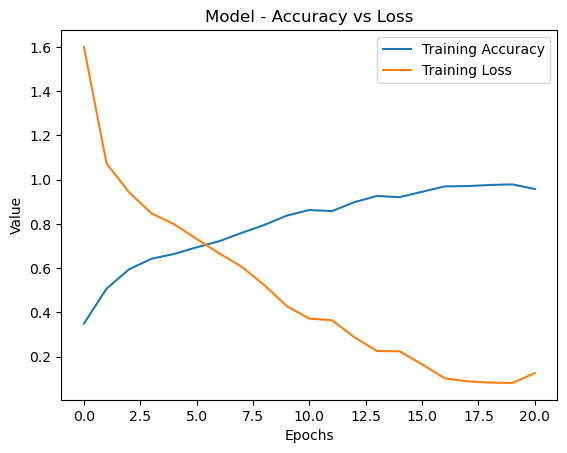

In [35]:
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='Training Loss')
plt.title('Model - Accuracy vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

#modelin eğitim sürecinde doğruluk ve kayıp değerlerinin nasıl değiştiğini gösterir.
# eğitim sürecindeki doğruluk (accuracy) ve kayıp (loss) değerlerini görselleştirir.

Bu grafik, modelin eğitim sürecindeki doğruluk (accuracy) ve kayıp (loss) değerlerinin değişimini göstermektedir:

Mavi Çizgi (Training Accuracy): Modelin eğitim verisindeki doğruluk oranını ifade eder. Grafikten, doğruluğun başlangıçta düşük olduğu, ancak her epoch'ta arttığı ve yaklaşık 10. epoch'tan sonra bir doyum noktasına ulaştığı görülüyor. Bu, modelin eğitim verisinde öğrenmeye başladığını ve zamanla daha doğru tahminler yaptığını gösterir.

Turuncu Çizgi (Training Loss): Modelin eğitim verisindeki kayıp değerini ifade eder. Başlangıçta kayıp değeri oldukça yüksekken, her epoch'ta azalarak modelin hata oranını düşürdüğü görülmektedir. 15. epoch civarında kaybın çok düşük bir değere ulaştığı görülüyor, bu da modelin artık daha az hata yaptığını gösterir.

Yorum:
Eğitim doğruluğu artıyor ve eğitim kaybı azalıyor, bu durum modelin eğitim verisine uyum sağladığını ve doğru şekilde öğrenme gerçekleştirdiğini gösteriyor.
Ancak, eğer model doğruluğu bu şekilde artmaya devam ederken validasyon (test) doğruluğu artmıyorsa, aşırı öğrenme (overfitting) riski olabilir. Bu nedenle yalnızca bu grafik yeterli değildir; validasyon verilerinin performansı da kontrol edilmelidir.

In [36]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


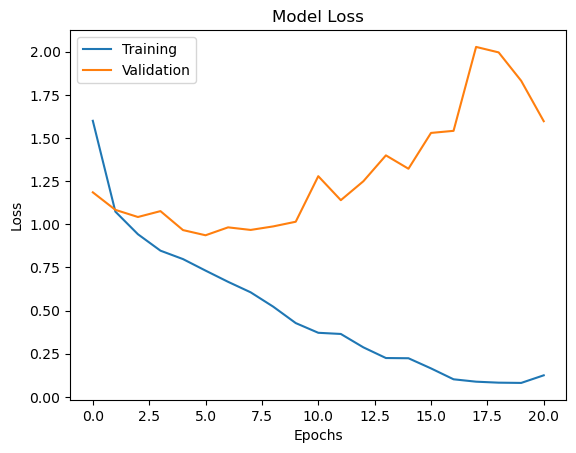

In [37]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kayıplarını çizme
plt.plot(history.history['loss'], label='Training Loss')  # Doğrudan history değişkeninden erişim
plt.plot(history.history['val_loss'], label='Validation Loss')  # Doğrudan history değişkeninden erişim

# Grafik ayarları
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'])
plt.show()


Bu grafik, modelin eğitim ve doğrulama verisindeki kayıp (loss) değişimini gösteriyor:

Eğitim Kaybı (Mavi Çizgi): Sürekli azalıyor, modelin eğitim verisine iyi uyum sağladığını gösteriyor.
Doğrulama Kaybı (Turuncu Çizgi): Başlangıçta düşse de 10. epoch’tan sonra artmaya başlıyor ve dalgalanıyor. Bu, modelin doğrulama verisinde genelleme yapamadığını ve overfitting belirtileri olduğunu gösteriyor.
Çözüm Önerileri:

Daha fazla veri kullanmak.
Dropout veya erken durdurma (early stopping) gibi yöntemler eklemek.
Model mimarisini gözden geçirmek.

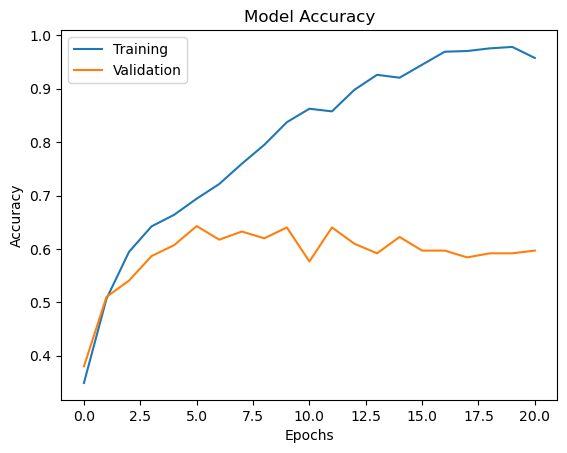

In [38]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluğunu çizme
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Doğrudan history değişkeninden erişim
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Doğrudan history değişkeninden erişim

# Grafik ayarları
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'])
plt.show()


Bu grafik, modelin eğitim ve doğrulama verisindeki doğruluk (accuracy) değişimini gösteriyor:

Eğitim Doğruluğu (Mavi Çizgi): Sürekli artarak neredeyse 1.0’a yaklaşıyor. Bu, modelin eğitim verisine aşırı uyum sağladığını (overfitting) gösteriyor.
Doğrulama Doğruluğu (Turuncu Çizgi): İlk başta artıyor, ancak yaklaşık 10. epoch’tan sonra sabitleniyor ve çok daha düşük bir seviyede kalıyor. Bu, modelin doğrulama verisinde genelleme yapmada zorluk yaşadığını gösteriyor.
Özet: Model, eğitim verisinde çok başarılı ancak doğrulama verisinde düşük performans sergiliyor. Bu, overfitting probleminin bir göstergesidir.

Çözüm Önerileri:

Veriyi artırmak veya veri artırma (data augmentation) uygulamak.
Dropout katmanları eklemek.
Modelin karmaşıklığını azaltmak (örneğin, katman sayısını düşürmek).
Erken durdurma (early stopping) yöntemini kullanmak.

In [39]:
print(model.history.history.keys())  # Geçerli anahtarları yazdır


dict_keys([])


<a id="content5"></a>
## E. Visualizing Predictons on the Validation Set

In [40]:
# getting predictions on val set.
pred=model.predict(X_test)
print("Predicted Probabilities -\n",pred[:4])
pred_digits=np.argmax(pred,axis=1)#Her tahmin için en yüksek olasılığa sahip sınıfı (etiketi) seçer.
print("\nPredicted Class [Highest Prob] -",pred_digits[:4]) #İlk 4 tahminin sınıflarını (en yüksek olasılığa sahip olanları) yazdırır.
#Bu kod, test verisi üzerinde modelin tahminlerini yapar ve sonuçları gösterir.

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step
Predicted Probabilities -
 [[7.3535661e-03 3.2362995e-01 2.7006507e-05 6.6898948e-01]
 [2.3032115e-01 1.8823883e-01 5.7817131e-01 3.2687185e-03]
 [8.3515879e-06 9.8739547e-01 2.8662858e-13 1.2596124e-02]
 [6.0649249e-03 9.0592164e-01 3.8567701e-05 8.7974854e-02]]

Predicted Class [Highest Prob] - [3 2 1 1]


In [41]:
# doğru ve yanlış sınıflandırılan örneklerin indekslerini saklar..
i=0
prop_class=[] #Eğer tahmin ve gerçek etiket eşleşiyorsa, o indeks prop_class listesine eklenir.
mis_class=[] # Eğer tahmin ve gerçek etiket eşleşmiyorsa, o indeks mis_class listesine eklenir.

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break
    #Her iki listeye 8 örnek eklenene kadar döngü devam eder.

### CORRECTLY CLASSIFIED FLOWER IMAGES

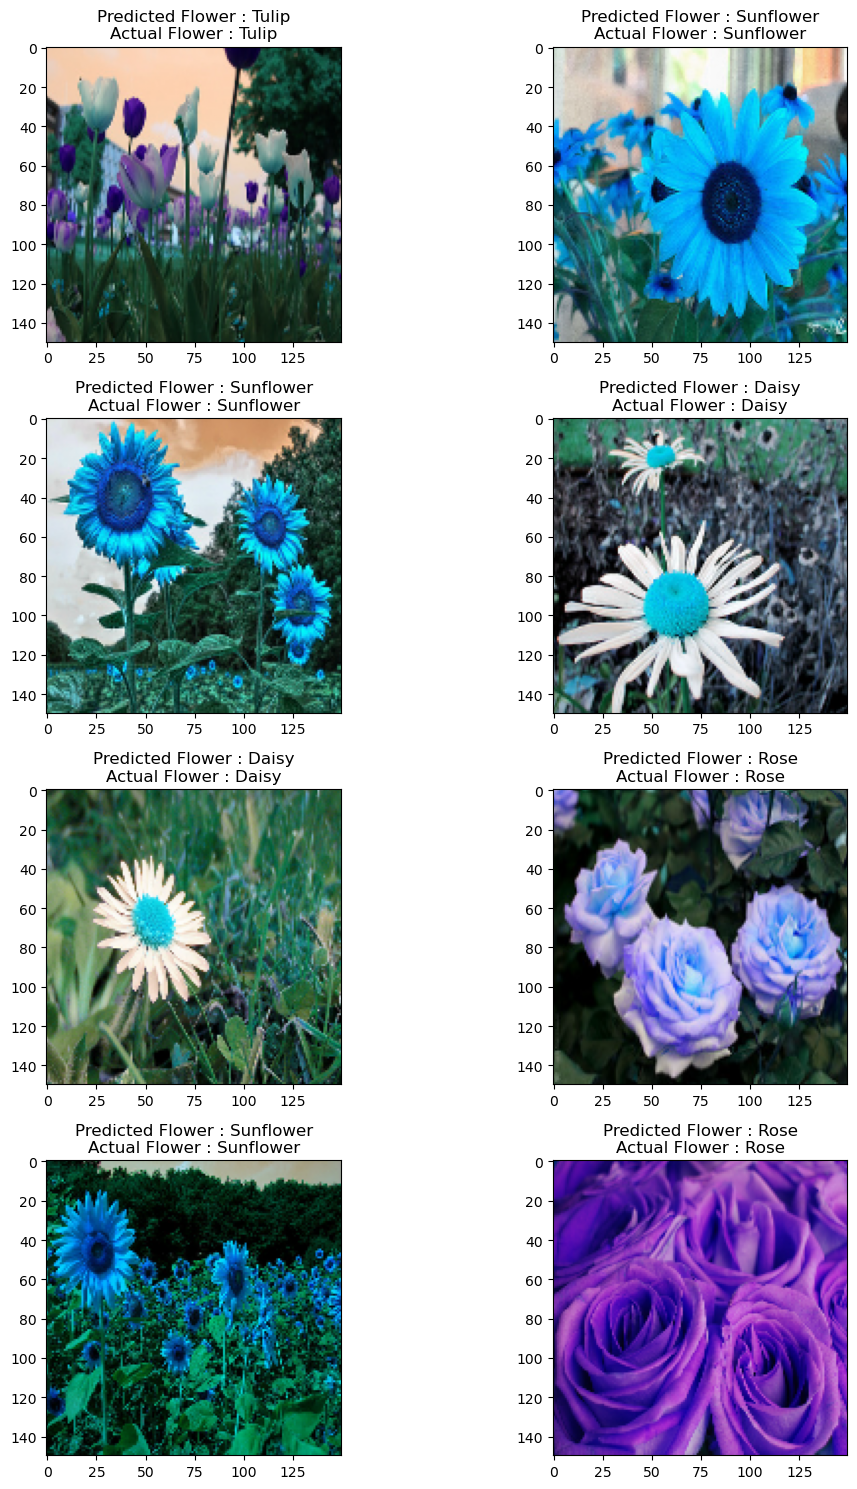

In [42]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)

for i in range(4):
    for j in range(2):
        ax[i, j].imshow(X_test[prop_class[count]])
        # Predicted label ve Actual label için inverse_transform'ü düzeltme
        predicted_label = le.inverse_transform([pred_digits[prop_class[count]]])
        actual_label = le.inverse_transform([np.argmax(y_test[prop_class[count]])])
        
        ax[i, j].set_title("Predicted Flower : " + str(predicted_label[0]) + "\n" +
                           "Actual Flower : " + str(actual_label[0]))
        plt.tight_layout()
        count += 1
#Bu kod, doğru sınıflandırılan test örneklerini görselleştirir ve her birinin tahmin edilen ve gerçek etiketlerini başlık olarak ekler.

### MISCLASSIFIED IMAGES OF FLOWERS

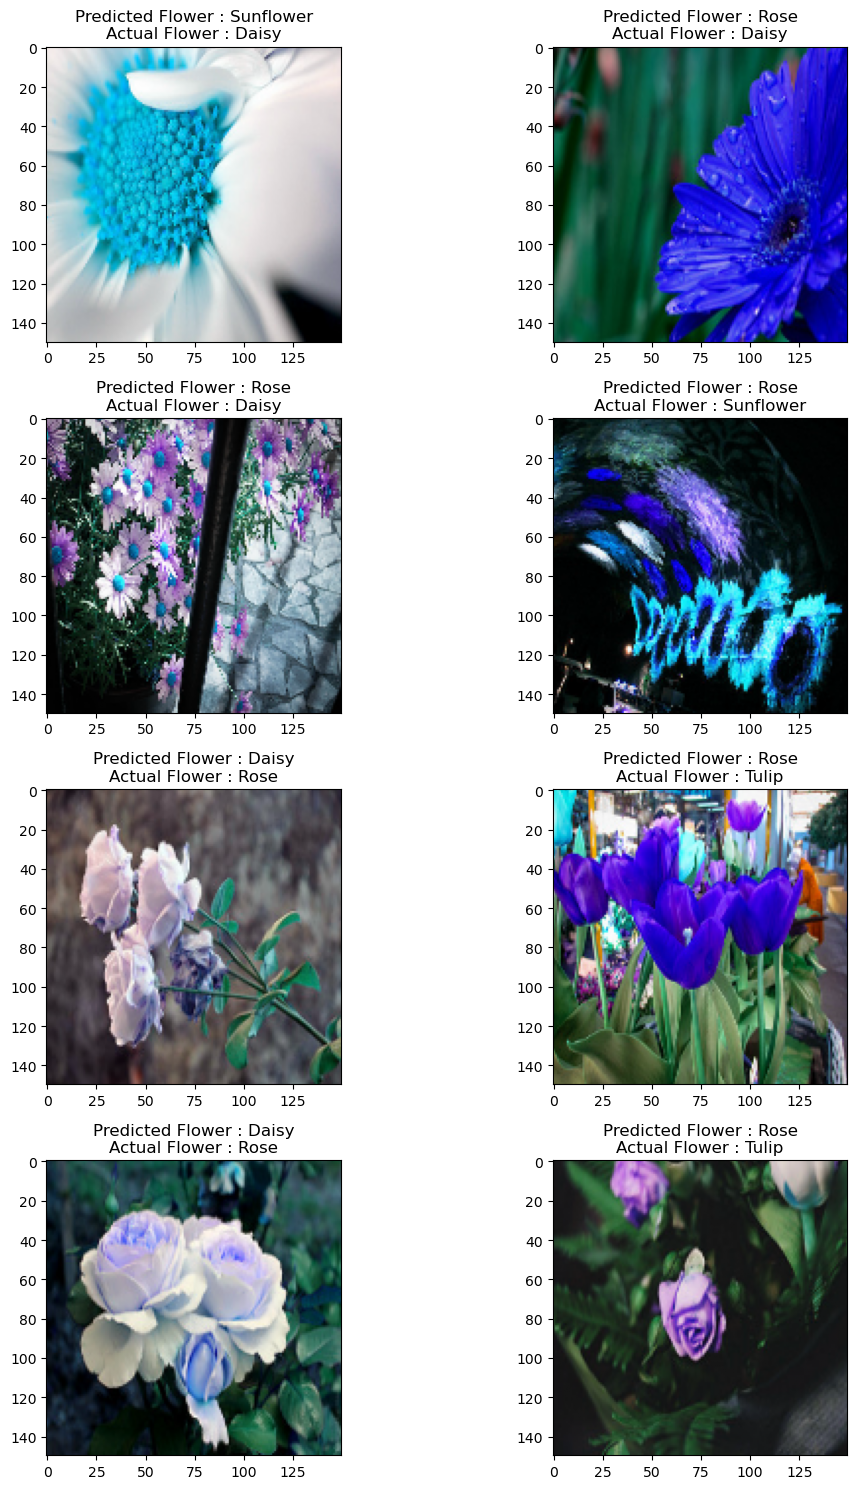

In [43]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)

for i in range(4):
    for j in range(2):
        # Predicted label ve Actual label için inverse_transform'ü düzeltme
        predicted_label = le.inverse_transform([pred_digits[mis_class[count]]])  # 1D array olarak sağlanmalı
        actual_label = le.inverse_transform([np.argmax(y_test[mis_class[count]])])  # 1D array olarak sağlanmalı
        
        # Görselleri ve başlıkları ayarlama
        ax[i, j].imshow(X_test[mis_class[count]])
        ax[i, j].set_title("Predicted Flower : " + str(predicted_label[0]) + "\n" +
                           "Actual Flower : " + str(actual_label[0]))
        plt.tight_layout()
        count += 1
